# Project: E-commerce Sales Analysis

# Load and Prepare the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Web_Traffic.csv')
df.head()

,VisitID,Date,UserType,Device,SessionDuration,PagesVisited
0,1,2023-07-01,New,Mobile,120,3
1,2,2023-07-02,Returning,Desktop,300,5
2,3,2023-07-03,New,Tablet,240,4
3,4,2023-07-04,Returning,Mobile,180,3
4,5,2023-07-05,New,Desktop,350,6


# Explore the Data

In [3]:
df.isnull().sum()

VisitID            0
Date               0
UserType           0
Device             0
SessionDuration    0
PagesVisited       0
dtype: int64

In [4]:
df.describe()

,VisitID,SessionDuration,PagesVisited
count,10.00000,10.000000,10.000000
mean,5.50000,247.000000,4.400000
std,3.02765,83.672643,1.349897
min,1.00000,120.000000,3.000000
25%,3.25000,195.000000,3.250000
50%,5.50000,230.000000,4.000000
75%,7.75000,290.000000,5.000000
max,10.00000,400.000000,7.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VisitID          10 non-null     int64 
 1   Date             10 non-null     object
 2   UserType         10 non-null     object
 3   Device           10 non-null     object
 4   SessionDuration  10 non-null     int64 
 5   PagesVisited     10 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df

,VisitID,Date,UserType,Device,SessionDuration,PagesVisited
0,1,2023-07-01,New,Mobile,120,3
1,2,2023-07-02,Returning,Desktop,300,5
2,3,2023-07-03,New,Tablet,240,4
3,4,2023-07-04,Returning,Mobile,180,3
4,5,2023-07-05,New,Desktop,350,6
5,6,2023-07-06,Returning,Tablet,260,4
6,7,2023-07-07,New,Mobile,190,3
7,8,2023-07-08,Returning,Desktop,400,7
8,9,2023-07-09,New,Tablet,210,4
9,10,2023-07-10,Returning,Mobile,220,5


In [9]:
print (df.dtypes)

VisitID                     int64
Date               datetime64[ns]
UserType                   object
Device                     object
SessionDuration             int64
PagesVisited                int64
dtype: object


In [8]:
print(df.describe())

        VisitID                 Date  SessionDuration  PagesVisited
count  10.00000                   10        10.000000     10.000000
mean    5.50000  2023-07-05 12:00:00       247.000000      4.400000
min     1.00000  2023-07-01 00:00:00       120.000000      3.000000
25%     3.25000  2023-07-03 06:00:00       195.000000      3.250000
50%     5.50000  2023-07-05 12:00:00       230.000000      4.000000
75%     7.75000  2023-07-07 18:00:00       290.000000      5.000000
max    10.00000  2023-07-10 00:00:00       400.000000      7.000000
std     3.02765                  NaN        83.672643      1.349897


In [10]:
df.describe(include = "all")

,VisitID,Date,UserType,Device,SessionDuration,PagesVisited
count,10.00000,10,10,10,10.000000,10.000000
unique,NaN,NaN,2,3,NaN,NaN
top,NaN,NaN,New,Mobile,NaN,NaN
freq,NaN,NaN,5,4,NaN,NaN
mean,5.50000,2023-07-05 12:00:00,NaN,NaN,247.000000,4.400000
min,1.00000,2023-07-01 00:00:00,NaN,NaN,120.000000,3.000000
25%,3.25000,2023-07-03 06:00:00,NaN,NaN,195.000000,3.250000
50%,5.50000,2023-07-05 12:00:00,NaN,NaN,230.000000,4.000000
75%,7.75000,2023-07-07 18:00:00,NaN,NaN,290.000000,5.000000
max,10.00000,2023-07-10 00:00:00,NaN,NaN,400.000000,7.000000


# Session Duration by device

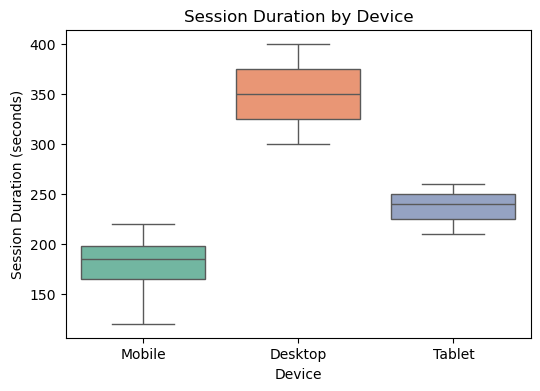

In [11]:
plt.figure(figsize = (6,4))
sns.boxplot(data = df, x = 'Device', y = 'SessionDuration', hue = 'Device', palette = 'Set2', legend = False)

plt.title('Session Duration by Device')
plt.xlabel('Device')
plt.ylabel('Session Duration (seconds)')
plt.show()

# Page Visited by user

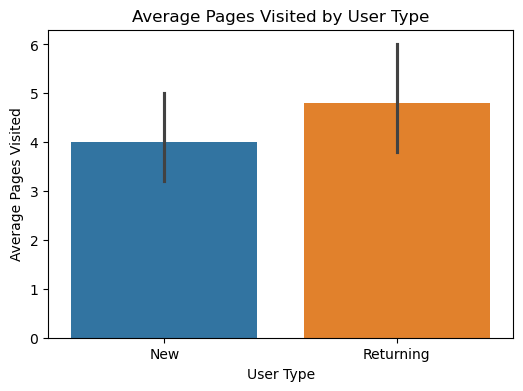

In [12]:
plt.figure(figsize = (6,4))
sns.barplot(data = df, x = 'UserType', y = 'PagesVisited', hue = 'UserType', legend = False)
plt.title('Average Pages Visited by User Type')
plt.xlabel('User Type')
plt.ylabel('Average Pages Visited')
plt.show()

# Trend over time: Average Session Duration

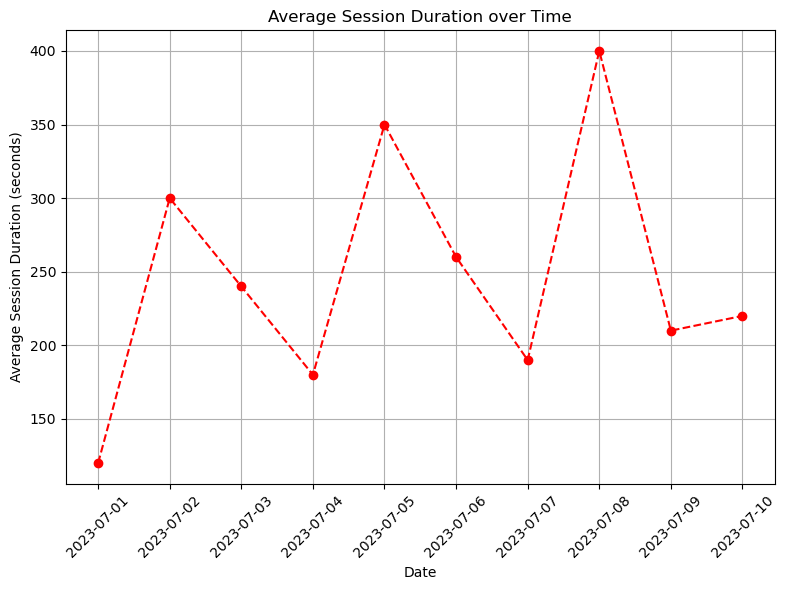

In [13]:
daily_avg = df.groupby('Date')['SessionDuration'].mean().reset_index()

#plot the trend

plt.figure(figsize = (8,6))
plt.plot(daily_avg['Date'], daily_avg['SessionDuration'], marker = 'o', linestyle = '--', color = 'red')
plt.title('Average Session Duration over Time')
plt.xlabel('Date')
plt.ylabel('Average Session Duration (seconds)')
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()

# Add Pie chart for device usage distribution

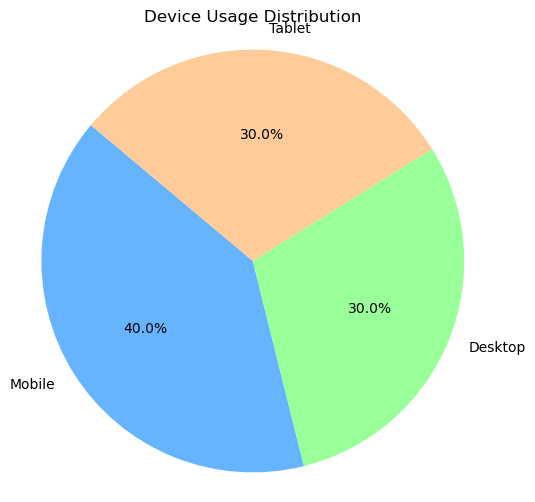

In [15]:
device_counts = df['Device'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(device_counts, 
        labels=device_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Device Usage Distribution')
plt.axis('equal') 

plt.show()

# Compare average pages visited by device

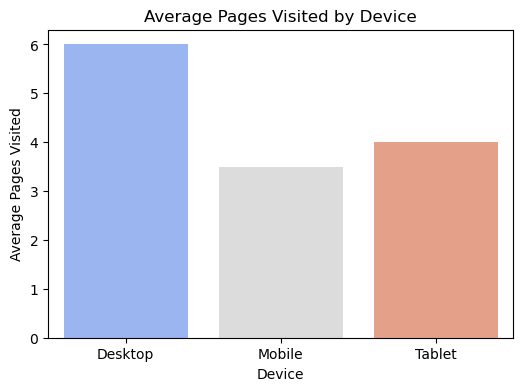

In [17]:
device_pages = df.groupby('Device')['PagesVisited'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=device_pages, x='Device', y='PagesVisited', hue='Device', palette='coolwarm', legend=False)
plt.title('Average Pages Visited by Device')
plt.xlabel('Device')
plt.ylabel('Average Pages Visited')

plt.show()

# Find Peak traffic days (based on no. of visits)

Peak Traffic Day(s):
        Date  VisitCount
0 2023-07-01           1
1 2023-07-02           1
2 2023-07-03           1
3 2023-07-04           1
4 2023-07-05           1
5 2023-07-06           1
6 2023-07-07           1
7 2023-07-08           1
8 2023-07-09           1
9 2023-07-10           1


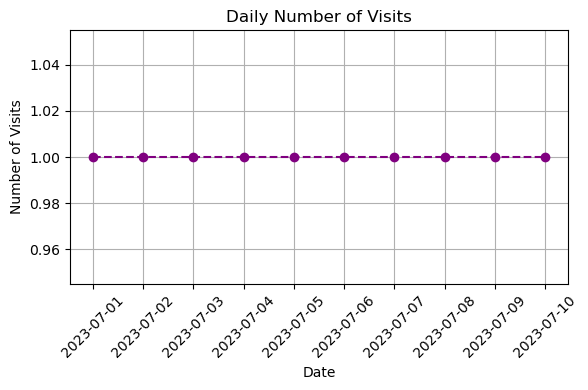

In [19]:
# Group by Date and count visits
daily_visits = df.groupby('Date').size().reset_index(name='VisitCount')

# Find the peak day(s)
peak_day = daily_visits[daily_visits['VisitCount'] == daily_visits['VisitCount'].max()]

print("Peak Traffic Day(s):")
print(peak_day)

# Optional: Line plot of traffic over time
plt.figure(figsize=(6, 4))
plt.plot(daily_visits['Date'], daily_visits['VisitCount'], marker='o', linestyle='--', color='purple')
plt.title('Daily Number of Visits')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusion

In [20]:
# Which device perform better?

avg_session_by_device = df.groupby('Device')['SessionDuration'].mean()
avg_pages_by_device = df.groupby('Device')['PagesVisited'].mean()

print("Average Session Duration by Device:\n", avg_session_by_device)
print("\nAverage Pages Visited by Device:\n", avg_pages_by_device)

Average Session Duration by Device:
 Device
Desktop    350.000000
Mobile     177.500000
Tablet     236.666667
Name: SessionDuration, dtype: float64

Average Pages Visited by Device:
 Device
Desktop    6.0
Mobile     3.5
Tablet     4.0
Name: PagesVisited, dtype: float64


In [21]:
# A new or returning users more engaged?

avg_session_by_user = df.groupby('UserType')['SessionDuration'].mean()
avg_pages_by_user = df.groupby('UserType')['PagesVisited'].mean()

print("Average Session Duration by User Type:\n", avg_session_by_user)
print("\nAverage Pages Visited by User Type:\n", avg_pages_by_user)

Average Session Duration by User Type:
 UserType
New          222.0
Returning    272.0
Name: SessionDuration, dtype: float64

Average Pages Visited by User Type:
 UserType
New          4.0
Returning    4.8
Name: PagesVisited, dtype: float64


In [22]:
# Any Noticeable trend over time?

daily_avg_session = df.groupby('Date')['SessionDuration'].mean()

print("Average Session Duration Over Time:\n", daily_avg_session)

Average Session Duration Over Time:
 Date
2023-07-01    120.0
2023-07-02    300.0
2023-07-03    240.0
2023-07-04    180.0
2023-07-05    350.0
2023-07-06    260.0
2023-07-07    190.0
2023-07-08    400.0
2023-07-09    210.0
2023-07-10    220.0
Name: SessionDuration, dtype: float64
